### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


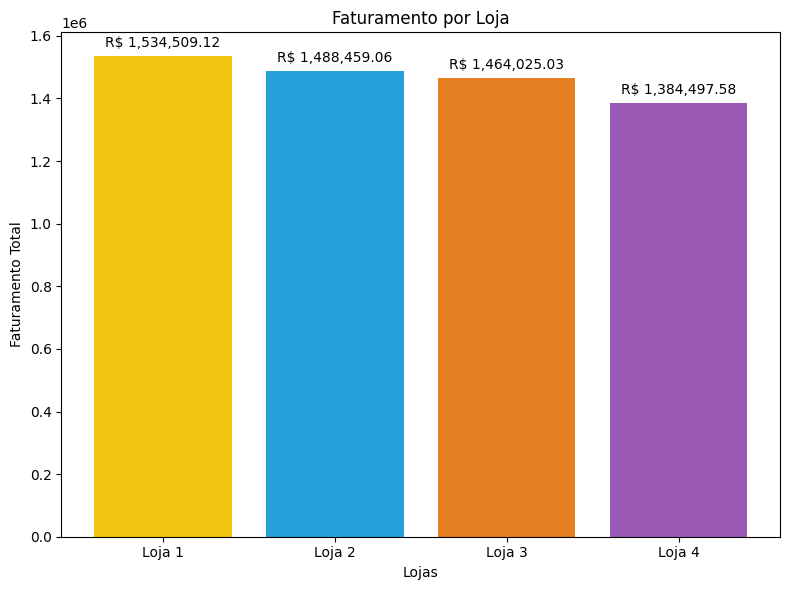

In [ ]:
import matplotlib.pyplot as plt

# Atribui dados a variaveis
faturamentoLoja1 = sum(loja["Preço"])
faturamentoLoja2 = sum(loja2["Preço"])
faturamentoLoja3 = sum(loja3["Preço"])
faturamentoLoja4 = sum(loja4["Preço"])

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [faturamentoLoja1, faturamentoLoja2, faturamentoLoja3, faturamentoLoja4]

# Cria a figura antes de adicionar os elementos de plotagem
plt.figure(figsize=(8, 6))

# Cria o Grafico Barra
plt.bar(lojas, faturamento, color = ["#f1c40f", "#27a1d9", "#e67e22", "#9b59b6"])


for i,  valor in enumerate(faturamento):
  plt.text(i, valor + 20000, f"R$ {valor:,.2f}", ha = "center", va = "bottom", fontsize = 10)

# Adiciona Rótulos
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total")
plt.title("Faturamento por Loja")

# Mostra o Grafico
plt.tight_layout()
plt.show()

In [ ]:
#Exibindo resultados
print("Fatura por Loja")
print(f"Faturamento Total Loja 1: R$ {faturamentoLoja1:,.2f}")
print(f"Faturamento Total Loja 2: R$ {faturamentoLoja2:,.2f}")
print(f"Faturamento Total Loja 3: R$ {faturamentoLoja3:,.2f}")
print(f"Faturamento Total Loja 4: R$ {faturamentoLoja4:,.2f}")

Fatura por Loja
Faturamento Total Loja 1: R$ 1,534,509.12
Faturamento Total Loja 2: R$ 1,488,459.06
Faturamento Total Loja 3: R$ 1,464,025.03
Faturamento Total Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [ ]:
# Função para contar a quantidade de vendas de cada categoria
def vendasCategoria(lojas):
  categoriaLoja = set(lojas['Categoria do Produto'])
  totalVendas = {}
  for categoria in categoriaLoja:
    quantidade = lojas['Categoria do Produto'].value_counts()[categoria]
    totalVendas[categoria] = int(quantidade)
    totalVendas = dict(sorted(totalVendas.items(), key=lambda item: item[1], reverse=True))
  return totalVendas

# Atribui os resultados da função a variaveis
resultadoLoja = (vendasCategoria(loja))
resultadoLoja2 = (vendasCategoria(loja2))
resultadoLoja3 = (vendasCategoria(loja3))
resultadoLoja4 = (vendasCategoria(loja4))

# Exibindo o resultado
print(resultadoLoja)
print(resultadoLoja2)
print(resultadoLoja3)
print(resultadoLoja4)

{'moveis': 465, 'eletronicos': 448, 'brinquedos': 324, 'eletrodomesticos': 312, 'esporte e lazer': 284, 'instrumentos musicais': 182, 'livros': 173, 'utilidades domesticas': 171}
{'moveis': 442, 'eletronicos': 422, 'brinquedos': 313, 'eletrodomesticos': 305, 'esporte e lazer': 275, 'instrumentos musicais': 224, 'livros': 197, 'utilidades domesticas': 181}
{'moveis': 499, 'eletronicos': 451, 'brinquedos': 315, 'eletrodomesticos': 278, 'esporte e lazer': 277, 'livros': 185, 'utilidades domesticas': 177, 'instrumentos musicais': 177}
{'moveis': 480, 'eletronicos': 451, 'brinquedos': 338, 'esporte e lazer': 277, 'eletrodomesticos': 254, 'utilidades domesticas': 201, 'livros': 187, 'instrumentos musicais': 170}


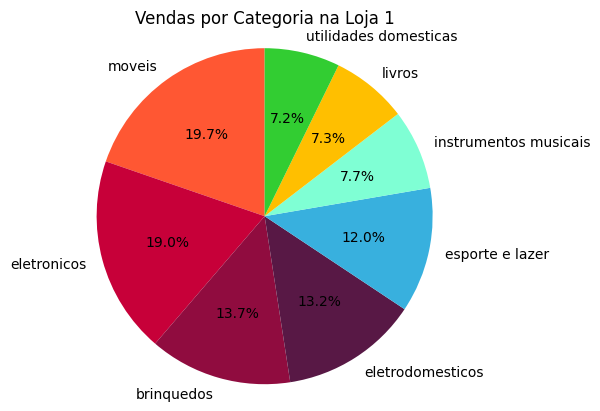

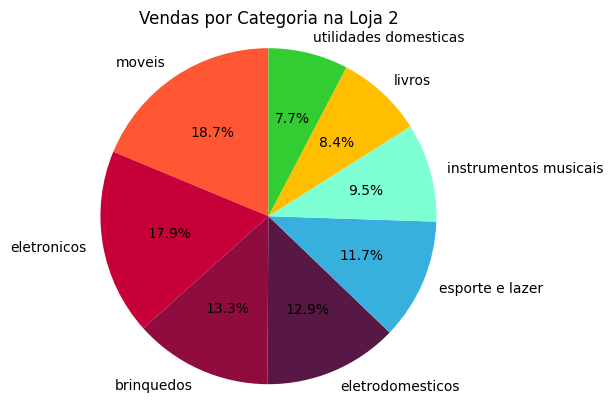

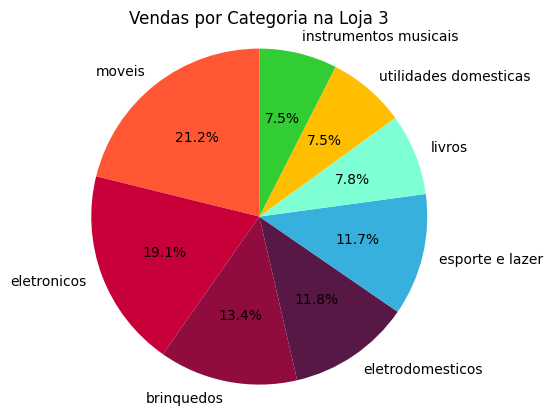

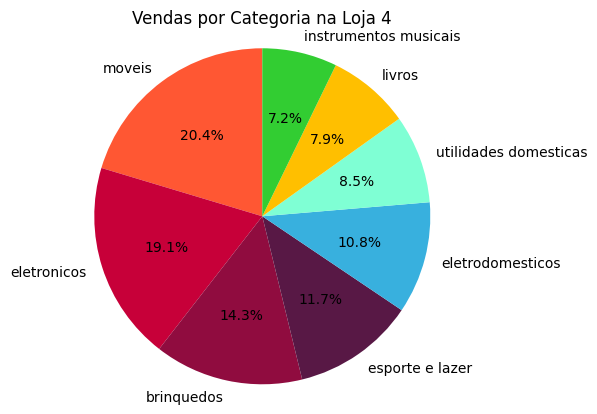

In [ ]:
# Criando o grafico pizza
def graficoVendaCategoria(resultado, loja):
  plt.pie(resultado.values(), labels=resultado.keys(), autopct='%1.1f%%', startangle=90, colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#38B0DE', '#7FFFD4', '#FFBF00', '#32CD32'])
  plt.title(f"Vendas por Categoria na Loja {loja}")
  plt.axis('equal')
  return plt.show()

#Grafico da Loja 1
graficoVendaCategoria(resultadoLoja, 1)
#Grafico da Loja 2
graficoVendaCategoria(resultadoLoja2, 2)
#Grafico da Loja 3
graficoVendaCategoria(resultadoLoja3, 3)
#Grafico da Loja 4
graficoVendaCategoria(resultadoLoja4, 4)

# 3. Média de Avaliação das Lojas

In [ ]:
# Função que calcula a media das Avaliações
def mediaAvaliacao(lojas):
  soma = sum(lojas["Avaliação da compra"])
  media = soma / len(lojas["Avaliação da compra"])
  return round(media, 2)

# Atribui o resultado da função a uma variavel
mediaLoja1 = mediaAvaliacao(loja)
mediaLoja2 = mediaAvaliacao(loja2)
mediaLoja3 = mediaAvaliacao(loja3)
mediaLoja4 = mediaAvaliacao(loja4)

# Atribui as variaveis a uma lista
mediaLista = [mediaLoja1, mediaLoja2, mediaLoja3, mediaLoja4]

# Calcula a media geral da avalição entre as lojas
geral = sum(mediaLista) / len(mediaLista)
print(f"Media de avalição geral entre lojas é: {round(geral, 2)}")

# Exibe os resultados da média de avaliação
print("Média de Avaliação por Loja")
print(f"Média de Avaliação da Loja 1: {mediaLoja1:.2f}")
print(f"Média de Avaliação da Loja 2: {mediaLoja2:.2f}")
print(f"Média de Avaliação da Loja 3: {mediaLoja3:.2f}")
print(f"Média de Avaliação da Loja 4: {mediaLoja4:.2f}")

Media de avalição geral entre lojas é: 4.02
Média de Avaliação por Loja
Média de Avaliação da Loja 1: 3.98
Média de Avaliação da Loja 2: 4.04
Média de Avaliação da Loja 3: 4.05
Média de Avaliação da Loja 4: 4.00


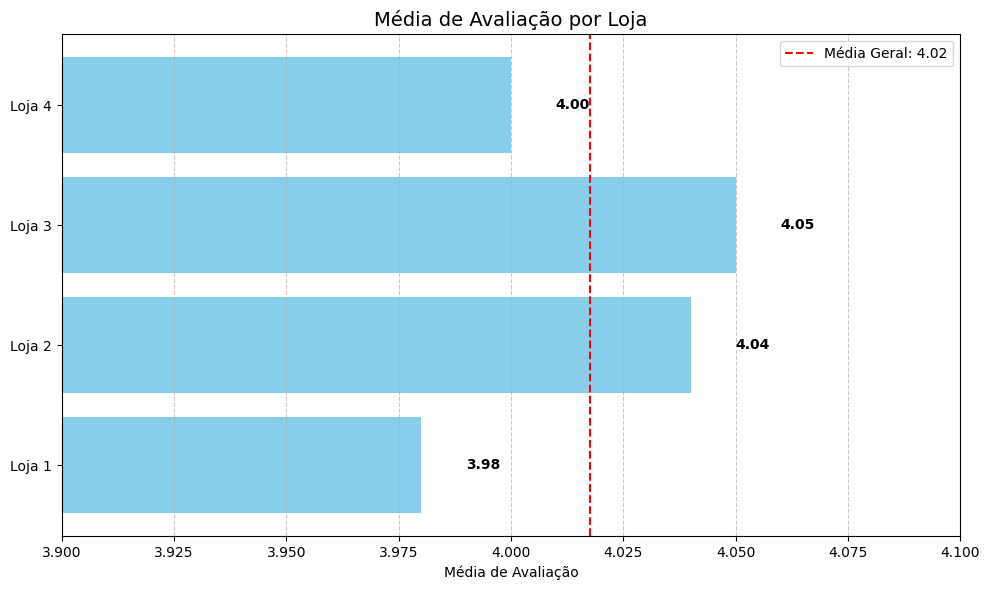

In [ ]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(lojas, mediaLista, color='skyblue')

# Adicionando valor numérico no final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             va='center', fontweight='bold')

# Definindo limites do eixo X para destacar as diferenças
plt.xlim(3.90, 4.10)  # Ajuste conforme necessário para seus dados

# Adicionando título e rótulos
plt.title('Média de Avaliação por Loja', fontsize=14)
plt.xlabel('Média de Avaliação')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando uma linha para a média geral
plt.axvline(x=geral, color='red', linestyle='--', label=f'Média Geral: {geral:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produtoPopular(resultado, lojas):
  maisVendido = max(resultado, key=resultado.get)
  menosVendido = min(resultado, key=resultado.get)

  print(f"O Produto mais vendido na Loja {lojas} são os {maisVendido} com {resultado[maisVendido]} vendas")
  print(f"O Produto menos vendido na Loja {lojas} são os {menosVendido} com {resultado[menosVendido]} vendas")

produtoPopular(resultadoLoja, 1)
produtoPopular(resultadoLoja2, 2)
produtoPopular(resultadoLoja3, 3)
produtoPopular(resultadoLoja4, 4)

O Produto mais vendido na Loja 1 são os moveis com 465 vendas
O Produto menos vendido na Loja 1 são os utilidades domesticas com 171 vendas
O Produto mais vendido na Loja 2 são os moveis com 442 vendas
O Produto menos vendido na Loja 2 são os utilidades domesticas com 181 vendas
O Produto mais vendido na Loja 3 são os moveis com 499 vendas
O Produto menos vendido na Loja 3 são os utilidades domesticas com 177 vendas
O Produto mais vendido na Loja 4 são os moveis com 480 vendas
O Produto menos vendido na Loja 4 são os instrumentos musicais com 170 vendas


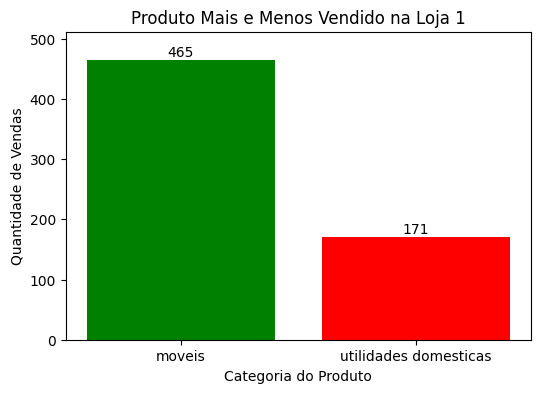

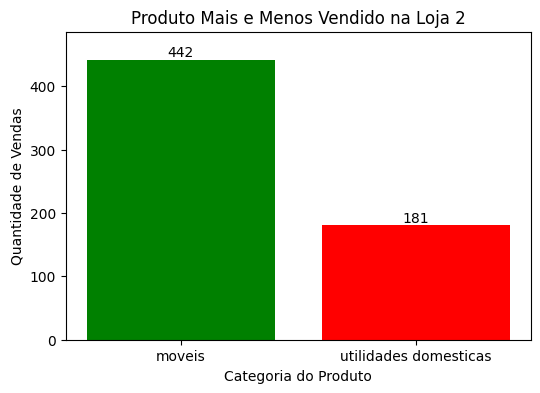

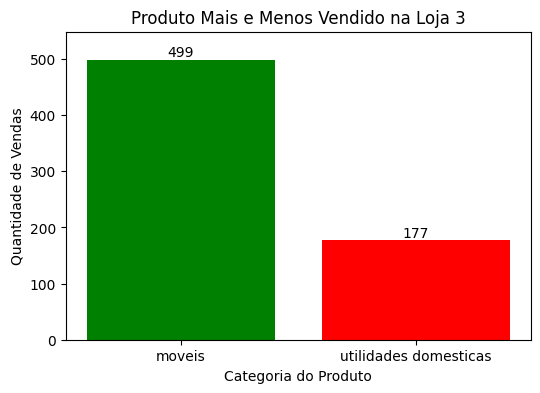

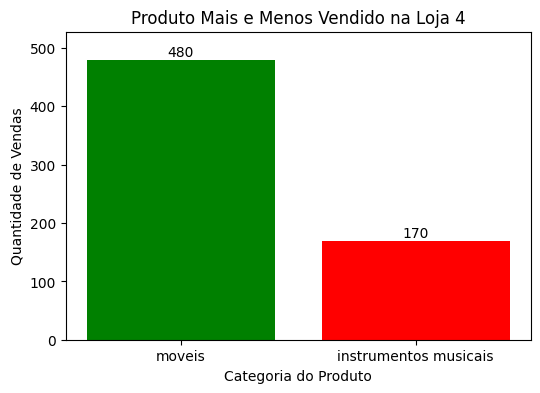

In [ ]:
def plotarCategorias(dados, nomeLoja):
    # Calcular as vendas para cada categoria
    vendasCat = dados['Categoria do Produto'].value_counts()

    # Obter as categorias mais e menos vendidas e suas quantidades
    catMais = vendasCat.index[0]
    qtdMais = vendasCat.iloc[0]
    catMenos = vendasCat.index[-1]
    qtdMenos = vendasCat.iloc[-1]

    # Criar rótulos e quantidades para o gráfico de barras
    rotulos = [catMais, catMenos]
    qtds = [qtdMais, qtdMenos]

    # Criar o gráfico de barras
    plt.figure(figsize=(6, 4))
    barras = plt.bar(rotulos, qtds, color=['green', 'red'])

    # Adicionar as quantidades no topo das barras
    for barra in barras:
        valY = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, valY, round(valY, 2), ha='center', va='bottom')

    # Adicionar rótulos e título
    plt.xlabel("Categoria do Produto")
    plt.ylabel("Quantidade de Vendas")
    plt.title(f"Produto Mais e Menos Vendido na {nomeLoja}")
    plt.ylim(0, max(qtds) * 1.1)  # Ajustar limite do eixo y para melhor visualização
    plt.show()

# Plotar para cada loja
plotarCategorias(loja, "Loja 1")
plotarCategorias(loja2, "Loja 2")
plotarCategorias(loja3, "Loja 3")
plotarCategorias(loja4, "Loja 4")


# 5. Frete Médio por Loja


In [ ]:
# Função que calcula a média dos valores de frete das lojas
def frete(lojas):
  soma = sum(lojas["Frete"])
  media = soma / len(lojas["Frete"])
  return round(media, 2)
# Armazena os resultados em uma lista
mediaFreteLoja1 = frete(loja)
mediaFreteLoja2 = frete(loja2)
mediaFreteLoja3 = frete(loja3)
mediaFreteLoja4 = frete(loja4)

freteLista = [mediaFreteLoja1, mediaFreteLoja2, mediaFreteLoja3, mediaFreteLoja4]

# Médias de frete para cada loja
print("Média de Frete por Loja")
print(f"Média de Frete da Loja 1: {mediaFreteLoja1:.2f}")
print(f"Média de Frete da Loja 2: {mediaFreteLoja2:.2f}")
print(f"Média de Frete da Loja 3: {mediaFreteLoja3:.2f}")
print(f"Média de Frete da Loja 4: {mediaFreteLoja4:.2f}")

Média de Frete por Loja
Média de Frete da Loja 1: 34.69
Média de Frete da Loja 2: 33.62
Média de Frete da Loja 3: 33.07
Média de Frete da Loja 4: 31.28


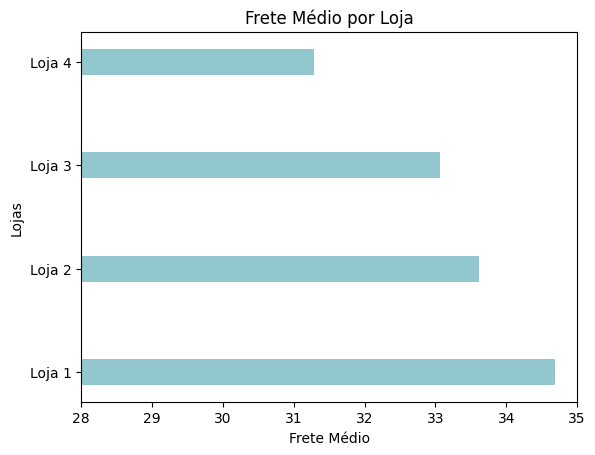

In [ ]:
#Cria um gráfico de barras horizontais
plt.barh(lojas, freteLista, color = '#92C7CF', height = 0.25)
plt.xlabel('Frete Médio')
plt.ylabel('Lojas')
plt.title('Frete Médio por Loja')
plt.xlim(28, 35)
plt.show()


# Relatório Final


# Recomendação para Venda de Loja

O objetivo desta análise é ajudar o Senhor João a decidir qual das suas quatro Alura Store deve ser vendida para financiar um novo empreendimento. Avaliamos cada loja com base na receita total, volume de vendas, desempenho da categoria de produto, avaliações de clientes e custos de envio.

**Análise e Resultados:**

**Receita Total e Volume de Vendas:** A Loja 1 lidera em receita total, enquanto a Loja 4 está consistentemente atrás das demais em receita e receita por venda.

**Avaliações de Clientes:** Todas as Alura Store têm avaliações médias semelhantes, com a Loja 3 ligeiramente à frente. A Loja 1 tem a avaliação média mais baixa, mas a diferença é marginal.

**Custos de Envio:** A Loja 4 oferece o menor custo médio de envio, o que pode ser uma vantagem competitiva, mas isso não se traduziu em vendas ou receita maiores.

**Desempenho da Categoria de Produto:** Todas as Alura Store têm uma distribuição semelhante das categorias mais vendidas, com eletrônicos e móveis dominando as vendas.

A tabela detalhada acima fornece uma comparação lado a lado das métricas de desempenho de cada loja.
Conclusão e Recomendação

Com base nos dados, a Loja 4 se destaca como a loja menos eficiente:

Tem a menor receita total e a menor receita por venda.
Seu volume de vendas é ligeiramente inferior ao das demais.
Sua avaliação pelos clientes não é significativamente melhor para compensar seu desempenho financeiro mais fraco.
Mesmo com o menor custo de frete, a Loja 4 não conseguiu atrair mais clientes nem gerar vendas maiores.

**Recomendação:**

O Sr. João deveria considerar a venda da Loja 4. Ela apresenta o desempenho mais fraco na maioria das principais métricas, e seu menor custo de frete não compensou sua menor receita e vendas. A venda da Loja 4 teria o menor impacto negativo no desempenho geral dos negócios e liberaria recursos para o novo empreendimento.õRelatório Final: Recomendação para Venda de Loja
Introdução

O objetivo desta análise é ajudar o Senhor João a decidir qual das suas quatro Alura Store deve ser vendida para financiar um novo empreendimento. Avaliamos cada loja com base na receita total, volume de vendas, desempenho da categoria de produto, avaliações de clientes e custos de envio.
Análise e Resultados